# <font color=blue>__"Step-Wise Regression"__</font> 

This form of regression is used when we deal with multiple independent variables. In this technique, the selection of independent variables is done with the help of an automatic process, which involves no human intervention.

Stepwise Regression is sensitive to initial inputs, which can be mitigated by repeatedly running the algorithm on bootstrap samples.

## <font color=red>__Types Of Stepwise Regressions__</font>
#### 1. Forward Selection
Forward selection, which involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.

#### 2. Backward Elimination
Backward elimination, which involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically significant loss of fit.

#### 3. Bidirectional Elimination
Bidirectional elimination, a combination of the above, testing at each step for variables to be included or excluded.

In [29]:
#Ordinary least squares serves as a good protoype for machine learning.
# its a supervised algorithm that has a training procedure and deployment procedure.
# It can overfit in some cases.
# OLS has no means to throttle it back when it over fits.
# Below is one method of adjusting the throttle.
# Stepwise regression

#The problem with overfitting is that it performanes best on training data
# and cannot be replicated on new data.
#The answer might be getting rid of predictors.
# Getting rid of attributes and deciding how many to eliminate is
# called best subset selection.

#Using forward Stepwise regression to Control Overfitting

#Basic idea is to impose a constraint on the number of columns
# and then take all subsets of the columns of X that have that number of columns.
# and perform ordinary least squares regression.

# The process results in a list of the best choice of columns subsets.
# just pick the one with the least errors.

# the problem with subset it requires too much calculation.

# There are several techniques that avoid this.

# the idea with forward stepwise regression is to start
#  with one-column subsets and then given the best single column, to find best
# second column to append instead of evaluating all possible two-column subsets.


# Best subset selection and forward setpwise regression have simliar process,
# They train a series of models. They result in a parameterized family of models.

# The models vary in complexity and the final model is selected from the family
# on the basis of performance on the out-of-sample error.

import numpy

from sklearn import datasets, linear_model

from math import sqrt

import matplotlib.pyplot as plt

from urllib.request import urlopen

import pandas as pd

def xattrSelect(x, idxSet):
    # takes X matrix as list of list
    # and returns subset containing
    #columns in idxSet
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return (xOut)


# read data into iterable
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
              "wine-quality/winequality-red.csv")

data = urlopen(target_url)



xList = []
labels = []
names = []

firstLine = True
for line in data:
    if firstLine:
        names = line.strip().split(b";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().split(b";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove labels from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

# Divide attributes and labels into training and test sets

indices = range(len(xList))
xListTest = [xList[i] for i in indices if i %3 == 0]

xListTrain = [xList[i] for i in indices if i % 3 != 0]

labelsTest = [labels[i] for i in indices if i % 3 == 0]

labelsTrain = [labels[i] for i in indices if i % 3 != 0]

# build the list of attributes one-at-a-time starting with empty
attributeList = []
index = range(len(xList[1]))
indexSet = set(index)
indexSeq = []
oosError = []

for i in index:
    attSet = set(attributeList)
    #attributes not in list already
    attTrySet = indexSet - attSet
    #form into list
    attTry = [ii for ii in attTrySet]
    errorList = []
    attTemp = []
    #try each attributes not in set to see which one gives least oos error
    for iTry in attTry:
        attTemp = [] + attributeList
        attTemp.append(iTry)
        #use attTemp to form training and testing sub matrices
        #as list of Lists
        xTrainTemp = xattrSelect(xListTrain,attTemp)
        xTestTemp = xattrSelect(xListTest,attTemp)
        # form into numpy arrays
        xTrain = numpy.array(xTrainTemp)
        yTrain = numpy.array(labelsTrain)
        xTest = numpy.array(xTestTemp)
        yTest = numpy.array(labelsTest)
        wineQModel = linear_model.LinearRegression()
        wineQModel.fit(xTrain,yTrain)
        #use trained model to generate predicition and calculate rmsError
        rmsError = numpy.linalg.norm((yTest-wineQModel.predict(xTest)),
                                     2) / sqrt(len(yTest))
        errorList.append(rmsError)
        attTemp = []
    iBest = numpy.argmin(errorList)
    attributeList.append(attTry[iBest])
    oosError.append(errorList[iBest])

print ("out of sample error versus attribute set size")
for line in oosError:
    print(line)

print("\n" + "Best attribute indices")
for line in attributeList:
    print(line)

namesList = [names[i] for i in attributeList]
print("\n" + "Best attribute names")
for line in namesList:
    print(line)



out of sample error versus attribute set size
0.723425925512
0.686099315284
0.673436503342
0.66770332139
0.662255856852
0.659000475415
0.657271720614
0.657090580621
0.656999309645
0.657581894004
0.657390986901

Best attribute indices
10
1
9
4
6
8
5
3
2
7
0

Best attribute names
b'"alcohol"'
b'"volatile acidity"'
b'"sulphates"'
b'"chlorides"'
b'"total sulfur dioxide"'
b'"pH"'
b'"free sulfur dioxide"'
b'"residual sugar"'
b'"citric acid"'
b'"density"'
b'"fixed acidity"'


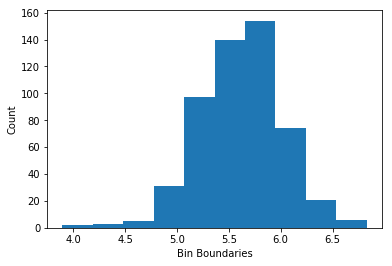

In [28]:
#plot histogram of out of sample errors for the best number of attributes
#Identify index corresponding to min value
#retrain with the corresponding attributes
#use the resulting model to predict against out of sample data
#Plot errors (aka residuals)

indexBest = oosError.index(min(oosError))
attributeBest = attributeList[1:(indexBest+1)]

#Define column-wise subsets of xListtrain and xListTest
#and convert to numpy
xTrainTemp = xattrSelect(xListTrain,attributeBest)
xTestTemp = xattrSelect(xListTest,attributeBest)
xTrain = numpy.array(xTrainTemp)
xTest = numpy.array(xTestTemp)

#train and plt error histogram
wineQModel = linear_model.LinearRegression()
wineQModel.fit(xTrain,yTrain)
errorVector = wineQModel.predict(xTest)
plt.hist(errorVector)

plt.xlabel("Bin Boundaries")
plt.ylabel("Count")
plt.show()



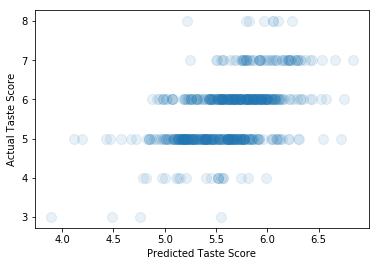

In [22]:
#Scatter plot of actual versus predicted
plt.scatter(wineQModel.predict(xTest), yTest, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()


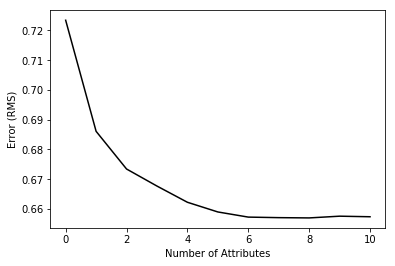

In [23]:
# Plot error versus number of attributes
x = range(len(oosError))

plt.plot(x, oosError, 'k')
plt.xlabel('Number of Attributes')
plt.ylabel('Error (RMS)')
plt.show()